In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Preprocessing

In [2]:
ogdata = pd.read_csv("Hotel Reservations.csv")

ogdata.head()

len(ogdata.index)

36275

In [3]:
ogdata = ogdata.dropna()

len(ogdata.index)

36275

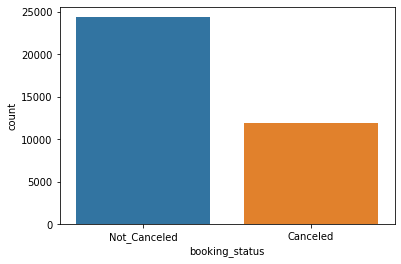

In [4]:
sns.countplot(x = ogdata["booking_status"])

They usually only let adults book hotel rooms so we can check to see how many rows have the number of adults equal to zero.

In [5]:
count = 0
for i in ogdata['no_of_adults']:
  
  if i == 0:
    count = count + 1

print(count)

139


In [6]:
data = ogdata[["no_of_weekend_nights", "no_of_week_nights", "room_type_reserved", "lead_time", "avg_price_per_room", "booking_status"]]

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [7]:
print(X)

[[1 2 'Room_Type 1' 224 65.0]
 [2 3 'Room_Type 1' 5 106.68]
 [2 1 'Room_Type 1' 1 60.0]
 ...
 [2 6 'Room_Type 1' 148 98.39]
 [0 3 'Room_Type 1' 63 94.5]
 [1 2 'Room_Type 1' 207 161.67]]


In [8]:
print(y)

['Not_Canceled' 'Not_Canceled' 'Canceled' ... 'Not_Canceled' 'Canceled'
 'Not_Canceled']


In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X)

[[1.0 0.0 0.0 ... 2 224 65.0]
 [1.0 0.0 0.0 ... 3 5 106.68]
 [1.0 0.0 0.0 ... 1 1 60.0]
 ...
 [1.0 0.0 0.0 ... 6 148 98.39]
 [1.0 0.0 0.0 ... 3 63 94.5]
 [1.0 0.0 0.0 ... 2 207 161.67]]


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)

[1 1 0 ... 1 0 1]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fitting the model

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 500, random_state = 42)
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [17]:
pred = mlp.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, pred)

array([[1604, 2003],
       [ 511, 6765]])

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.76      0.44      0.56      3607
           1       0.77      0.93      0.84      7276

    accuracy                           0.77     10883
   macro avg       0.76      0.69      0.70     10883
weighted avg       0.77      0.77      0.75     10883



In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.6872299913749653